**Задание 1.1**<br>
Преобразуйте столбец Date в формат datetime и выделите квартал (quarter) продажи объектов недвижимости. Найдите второй по популярности квартал продажи. В качестве ответа запишите число объектов, проданных в этом квартале.

In [1]:
import pandas as pd

melb_df = pd.read_csv('C:\Курс DS-3.0\IDE\Python_12\data\melb_data_fe.csv', sep=',')

In [25]:
melb_df["Date"] = pd.to_datetime(melb_df["Date"], dayfirst=True)
quarter_sold = melb_df["Date"].dt.quarter
quarter_sold.value_counts()

3    4873
2    4359
4    2329
1    2019
Name: Date, dtype: int64

**Задание 1.2**<br>
Преобразуйте все столбцы, в которых меньше 150 уникальных значений, в тип данных category, исключив из преобразования столбцы Date, Rooms, Bedroom, Bathroom, Car.
В качестве ответа запишите результирующее количество столбцов, которые имеют тип данных category.

In [16]:
cols_to_exclude = ['Date', 'Rooms', 'Bedroom', 'Bathroom', 'Car']
max_unique_count = 150
for col in melb_df.columns:
    if melb_df[col].nunique() < max_unique_count and col not in cols_to_exclude:
        melb_df[col] = melb_df[col].astype('category')
melb_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           13580 non-null  category      
 1   Rooms            13580 non-null  int64         
 2   Type             13580 non-null  category      
 3   Price            13580 non-null  float64       
 4   Method           13580 non-null  category      
 5   SellerG          13580 non-null  category      
 6   Date             13580 non-null  datetime64[ns]
 7   Distance         13580 non-null  float64       
 8   Postcode         13580 non-null  int64         
 9   Bedroom          13580 non-null  int64         
 10  Bathroom         13580 non-null  int64         
 11  Car              13580 non-null  int64         
 12  Landsize         13580 non-null  float64       
 13  BuildingArea     13580 non-null  float64       
 14  CouncilArea      12211 non-null  categ

**Задание 2.2**<br>
Произведите сортировку столбца AreaRatio по убыванию. При этом индексы полученной таблицы замените на новые. Какое значение площади здания находится в строке 1558? Ответ округлите до целого числа.

In [17]:
melb_df.sort_values(by='AreaRatio', ignore_index=True)
melb_df['BuildingArea'].loc[1558]

126.0

**Задание 2.3**<br>
Найдите таунхаусы (Type) с количеством жилых комнат (Rooms) больше 2. Отсортируйте полученную таблицу сначала по возрастанию числа комнат, а затем по убыванию средней площади комнат (MeanRoomsSquare). Индексы таблицы замените на новые. Какая цена будет у объекта в строке 18? Ответ запишите в виде целого числа.

In [34]:
mask1 = melb_df['Type'] == 'townhouse'
mask2 = melb_df['Rooms'] > 2
melb_df[mask1 & mask2].sort_values(
    by=['Rooms', 'MeanRoomsSquare'],
    ascending = [True, False],
     ignore_index = True
)['Price'].loc[18]


1300000.0

**Задание 3.1**<br>
Сгруппируйте данные по признаку количества комнат и найдите среднюю цену объектов недвижимости в каждой группе. В качестве ответа запишите количество комнат, для которых средняя цена наибольшая.

In [11]:
melb_df.groupby('Rooms')['Price'].agg('mean').sort_values(ascending=False)

Rooms
7     1.920700e+06
5     1.870260e+06
6     1.849366e+06
8     1.602750e+06
4     1.445282e+06
3     1.076081e+06
10    9.000000e+05
2     7.750812e+05
1     4.338245e+05
Name: Price, dtype: float64

**Задание 3.2**<br>
Какой регион имеет наименьшее стандартное отклонение по географической широте (Lattitude)?
В качестве ответа запишите название этого региона.

In [13]:
melb_df.groupby('Regionname')['Lattitude'].agg('std').sort_values()

Regionname
Western Victoria              0.011579
Southern Metropolitan         0.043080
Eastern Metropolitan          0.047890
Northern Metropolitan         0.049639
Western Metropolitan          0.051251
South-Eastern Metropolitan    0.073411
Northern Victoria             0.084455
Eastern Victoria              0.147067
Name: Lattitude, dtype: float64

!!!**Задание 3.3**<br>
Какая риелторская компания (SellerG) имеет наименьшую общую выручку за период с 1 мая по 1 сентября (включительно) 2017 года?
Для ответа на этот вопрос рассчитайте сумму продаж (Price) каждой компании в заданный период.
Не забудьте перевести даты в формат datetime

In [29]:
melb_df['Date'] = pd.to_datetime(melb_df['Date'], dayfirst=True)
date1 = pd.to_datetime("2017-05-01")
date2 = pd.to_datetime("2017-09-01")
mask = (date1 <= melb_df['Date']) & (melb_df['Date'] <= date2)
melb_df[mask].groupby('SellerG')['Price'].agg('sum').sort_values()


SellerG
LITTLE             2742000.0
Cayzer             4439000.0
Burnham            4550500.0
Moonee             7328000.0
Thomson            8332000.0
Bells              8656000.0
Alexkarbon        10985000.0
McDonald          14637500.0
Rendina           15422276.0
Nick              16890000.0
Douglas           18341000.0
Buckingham        19033000.0
C21               19515000.0
Eview             19791500.0
Collins           20217000.0
Philip            22051800.0
Chisholm          23225000.0
Williams          23297000.0
Love              23365500.0
Purplebricks      23401000.0
O'Brien           23855508.0
HAR               25568000.0
Village           26473000.0
RW                29261000.0
Raine             30687700.0
Stockdale         35409800.0
Sweeney           36882750.0
Gary              39138400.0
Hodges            43231000.0
YPA               46354350.0
Miles             47582000.0
Kay               48569500.0
RT                50498000.0
Brad              55955000.0
Jas   

**Задание 4.2**<br>
Составьте сводную таблицу, которая показывает зависимость медианной площади (BuildingArea) здания от типа объекта недвижимости (Type) и количества жилых комнат в доме (Rooms). Для какой комбинации признаков площадь здания наибольшая?
В качестве ответа запишите эту комбинацию (тип здания, число комнат) через запятую, без пробелов.

In [6]:
melb_df.pivot_table(
    values = 'BuildingArea',
    index = 'Type',
    columns = 'Rooms',
    aggfunc = 'median'
)

Rooms,1,2,3,4,5,6,7,8,10
Type,,,,,,,,,
house,126.0,126.0,126.0,141.0,177.0,126.0,216.5,126.0,126.0
townhouse,88.0,114.0,126.0,159.5,152.0,NaN,NaN,NaN,NaN
unit,69.5,110.0,126.0,126.0,NaN,171.0,NaN,126.0,NaN


**Задание 4.3**<br>
Составьте сводную таблицу, которая показывает зависимость медианной цены объекта недвижимости (Price) от риелторского агентства (SellerG) и типа здания (Type).
Во вновь созданной таблице найдите агентство, у которого медианная цена для зданий типа unit максимальна. В качестве ответа запишите название этого агентства.

In [13]:
pivot = melb_df.pivot_table(
    values = 'Price',
    index = 'SellerG',
    columns = 'Type',
    aggfunc = 'median'
)
pivot['unit'].sort_values(ascending=False)

SellerG
Nick             900000.0
Marshall         715000.0
Cayzer           707500.0
Kay              695000.0
Noel             693250.0
Buxton           670000.0
Fletchers        653000.0
Chisholm         640000.0
Philip           636000.0
RT               630000.0
C21              625500.0
RW               625500.0
Moonee           622000.0
O'Brien          618500.0
Hodges           605500.0
Eview            602000.0
Woodards         600000.0
Collins          592000.0
Jellis           591750.0
Purplebricks     582500.0
Williams         577000.0
hockingstuart    566000.0
Alexkarbon       560000.0
Miles            555000.0
Buckingham       553000.0
Gary             550000.0
Biggin           548000.0
Greg             547500.0
McGrath          542500.0
other            535000.0
Nelson           530000.0
HAR              518000.0
McDonald         502500.0
Barry            502000.0
Harcourts        500000.0
Ray              497500.0
Thomson          495000.0
Douglas          494500.0
Brad

**Задание 5.2**<br>
Сколько уникальных фильмов представлено в таблице movies?

In [2]:
movies = pd.read_csv('C:\Курс DS-3.0\IDE\Python_12\data\movies.csv', sep=',')

In [3]:
movies['movieId'].nunique()

9742

**!!! Задание 5.3**<br>
Сколько уникальных пользователей в таблице ratings1?

In [9]:
ratings1 = pd.read_csv('C:/Курс DS-3.0/IDE/Python_12/data/ratings1.csv', sep=';')
ratings1.nunique()

userId,movieId,rating    40001
dtype: int64

**Задание 5.4**<br>
В каком году было выставлено больше всего оценок?
Для ответа на этот вопрос используйте таблицу dates.

In [38]:
dates = pd.read_csv('C:\Курс DS-3.0\IDE\Python_12\data\dates.csv', sep=',')
dates['date'] = pd.to_datetime(dates["date"], dayfirst=True)
dates['date'].dt.year.mode()

0    2000
Name: date, dtype: int64

!!! **ЗАДАНИЕ 6.3** 

Допустим, в ваше распоряжение предоставлена директория "./Root/users/". В данной директории содержатся csv-файлы, в каждом из которых хранится информация об идентификаторах пользователей (user_id) и ссылки на их фотографии (photo_url). Каждый файл из папки users имеет примерно следующую структуру:

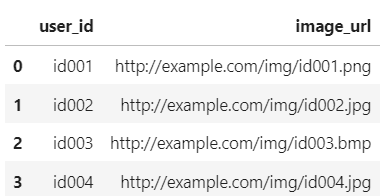

При проверке в директории может быть сколько угодно файлов (директория может изменяться в зависимости от устройства файловой системы).

Вам необходимо написать функцию concat_user_files(path), параметром которой является path — путь до директории. Функция должна объединить информацию из предоставленных вам файлов в один DataFrame и вернуть его. 

Список названий всех файлов, находящихся в директории, вы можете получить с помощью функции os.listdir(path) из модуля os (модуль уже импортирован в файле main.py). Например, для директории "./Root/users/" результатом работы функции будет список:

print(os.listdir('./Root/users/'))
['users2.csv', 'users1.csv', 'users3.csv']
Примечание. Модуль os позволяет работать с операционной системой компьютера прямо из кода. Подробнее о нем вы можете почитать здесь.

Отсортируйте этот список, прежде чем производить объединение файлов.

Когда вы получите отсортированный список, вам останется только прочитать все csv-файлы из списка в цикле и объединить прочитанные таблицы между собой.

Однако обратите внимание, что метод os.listdir() возвращает только список имён файлов в указанной директории, а при чтении файла необходимо указывать полный путь до него. То есть путь для чтения будет таким:

'./Root/users/{file_name}'
Не забудьте обновить индексы результирующей таблицы после объединения.

Учтите, что на тестовом наборе файлов в результате объединения могут возникнуть дубликаты, от которых необходимо будет избавиться.

Например, для директории "./Root/users/" результирующая таблица должна иметь следующий вид:

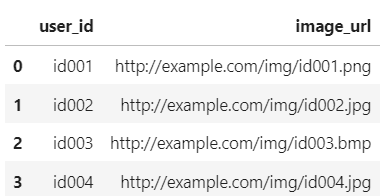

In [10]:
import pandas as pd
import os

def concat_users_files(path):
    data = pd.DataFrame()
    file_names = os.listdir(path)
    file_names = file_names.sort()
    for i in file_names:
        tmp_data = pd.read_csv(path + '/' + i)
        data = pd.concat([data, tmp_data], axis=0, ignore_index=True)
    data = data.drop_duplicates(ignore_index=True)
    return data
    
    """
    Вам необходимо написать функцию concat_user_files(path), параметром которой является path - путь до директории. 
    Функция должна объединить информацию из предоставленных вам файлов в один DataFrame и вернуть его. 
    Не забудьте обновить индексы результирующей таблицы после объединения.
    Учтите тот момент, что в результате объединения могут возникнуть дубликаты, от которых необходимо будет избавиться. 
    """


if __name__ == '__main__':
    data = concat_users_files('./Root/users/')

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: './Root/users/'